# Task 1: Unsupervised Learning

Unsupervised Learning dataset source link: https://archive.ics.uci.edu/ml/datasets/wholesale+customers

## Importing dataset and necessary libraries

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
data=pd.read_csv("../Coursework/Wholesale customers data.csv")  

In [3]:
#Viewing the dataset
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## Data Cleaning

In [4]:
#Viewing the datatypes of variables in the dataset
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Since all the variables are of integer datatype, we can use them directly for unsupervised learning

In [5]:
#Viewing the number of rows and columns of 'data'
data.shape

(440, 8)

In [6]:
#Dropping duplicate rows if there is any
data=data.drop_duplicates()

In [7]:
#Viewing the number of rows and columns of 'data' after removing duplicates
data.shape

(440, 8)

Since the number of rows and columns of 'data' after removing duplicates, it indicates that there were no duplicates in 'data'

In [8]:
#Checking for any missing values in 'data'
pd.isnull(data).sum(axis=0)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There was no missing values in 'data'

In [9]:
#Viewing descriptive statistics of 'data'
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
#Since there maybe presence of outliers in the numerical predictor variables, we try to remove them
q1 = data.quantile(0.25)  #Obtaining 1st quartile of each variable
q3 = data.quantile(0.75)  #Obtaining 3rd quartile of each variable
iqr = q3-q1               #Finding the Interquartile range for each variable             
ul = q3+1.5*iqr             #Finding the upper fence
Ll = q1-1.5*iqr             #Finding the lower fence
data=data[(data.Fresh < ul.Fresh) & (data.Fresh > Ll.Fresh)] 
data=data[(data.Milk < ul.Milk) & (data.Milk > Ll.Milk)]     
data=data[(data.Grocery < ul.Grocery) & (data.Grocery > Ll.Grocery)]
data=data[(data.Frozen < ul.Frozen) & (data.Frozen > Ll.Frozen)]
data=data[(data.Detergents_Paper < ul.Detergents_Paper) & (data.Detergents_Paper > Ll.Detergents_Paper)]
data=data[(data.Delicassen < ul.Delicassen) & (data.Delicassen > Ll.Delicassen)]

In [11]:
#Checking the shape of 'data'
data.shape

(332, 8)

The number of rows of 'data'  has fallen from 440 to 332 after removing potential outliers

## EDA

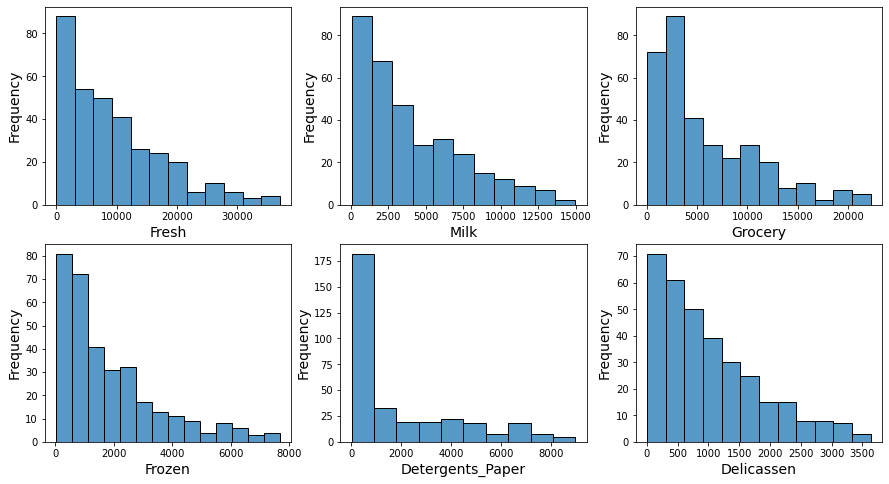

In [12]:
# Visualising the distributions of each continuous variable in 'data' using histograms
fig, axes=plt.subplots(2,3, figsize=(15,8))
axes= [ax for axes_row in axes for ax in axes_row]
numerical_features=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

for i,c in enumerate(numerical_features):
    sns.histplot(data[c] ,ax=axes[i])
    axes[i].set_ylabel('Frequency', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)
    
plt.show()

Amount of spendings on Fresh, Milk, Grocery, Frozen, Detergents_paper and Delicassen items are skewed to the right and seem to have a downward trend in frequencies. It is observed that the number of people who spend alot on these items are lower.

This indicates that these variables are skewed to the right hence we will standardise them below just before we start modelling

### Let's visualise how Total amount spent on items by customers vary between different channels and regions

In [13]:
#Giving meaning to every value in the column 'Channel' to make the visualisations more understandable
data['Channel'] = data['Channel'].replace([1,2], ['Horeca','Retail'])

In [14]:
#Giving meaning to every value in the column 'Region' to make the visualisations more understandable
data['Region'] = data['Region'].replace([1,2,3], ['Lisbon','Porto','Other Regions'])

In [15]:
#Finding the total amount spent on items
data['Total_Spending'] = data['Fresh']+ data['Milk']+ data['Grocery']+data['Frozen']+data['Detergents_Paper']+data['Delicassen']

In [16]:
#Using groupby function to group Total spending by Channel and Region
grouped_data=data.groupby(['Channel','Region'])['Total_Spending'].sum()

In [17]:
#Resetting the index
grouped_data=grouped_data.reset_index()

In [18]:
#Viewing 'grouped_data'
grouped_data

,Channel,Region,Total_Spending
0,Horeca,Lisbon,1061782
1,Horeca,Other Regions,3273098
2,Horeca,Porto,463685
3,Retail,Lisbon,295362
4,Retail,Other Regions,2614381
5,Retail,Porto,381476


Text(0.5, 1.0, 'Spend on Channel vs Region')

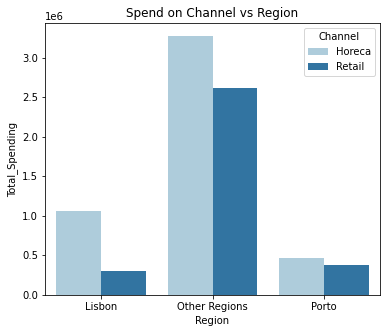

In [19]:
#Plotting a barplot
#Total spending by customers on channel per region 
plt.figure(figsize=(6,5))
sns.barplot(data=grouped_data,x='Region',y='Total_Spending',hue='Channel',palette='Paired')
plt.title('Spend on Channel vs Region')

It is observed that 'Other regions' are doing particularly well in the market followed by Lisbon and Oporto.


Customers seem to have spent more in HORECA than in Retail channels.

In [20]:
#Dropping 'Total_Spending' column since it won't be useful further for pca and kmeans
data=data.drop(['Total_Spending'], axis=1)

### Let's visualise how the spending on items vary between channels

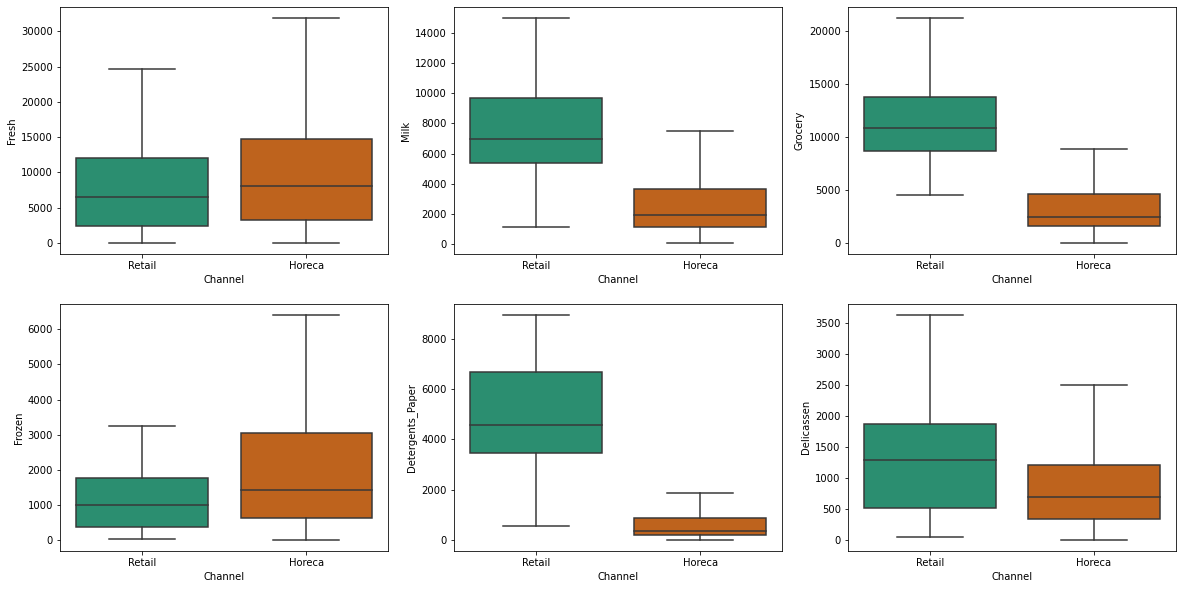

In [21]:
#Plotting side by side boxplots
fig, axes=plt.subplots(2,3, figsize=(20,10))
axes= [ax for axes_row in axes for ax in axes_row]

sns.boxplot(data=data,x='Channel',y='Fresh',ax=axes[0],palette='Dark2',showfliers = False) 
sns.boxplot(data=data,x='Channel',y='Milk',ax=axes[1],palette='Dark2',showfliers = False)
sns.boxplot(data=data,x='Channel',y='Grocery',ax=axes[2],palette='Dark2',showfliers = False)
sns.boxplot(data=data,x='Channel',y='Frozen',ax=axes[3],palette='Dark2',showfliers = False)
sns.boxplot(data=data,x='Channel',y='Detergents_Paper',ax=axes[4],palette='Dark2',showfliers = False)
sns.boxplot(data=data,x='Channel',y='Delicassen',ax=axes[5],palette='Dark2',showfliers = False)

plt.show()

It is observed that Retail channel is doing well in selling all items except for Fresh and Frozen products. 

### Let's analyse how the amount spent per item varies between different channels and regions through catplots

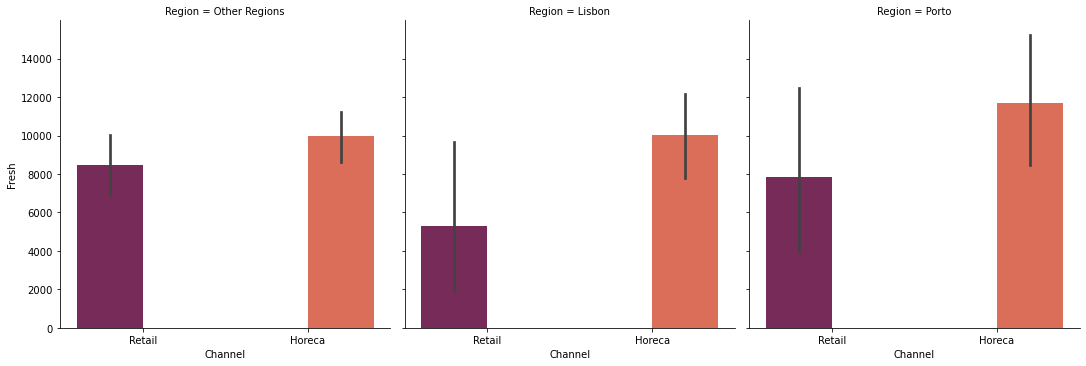

In [22]:
sns.catplot(x='Channel',y = 'Fresh',hue="Channel",col="Region",data=data,kind="bar", palette="rocket")

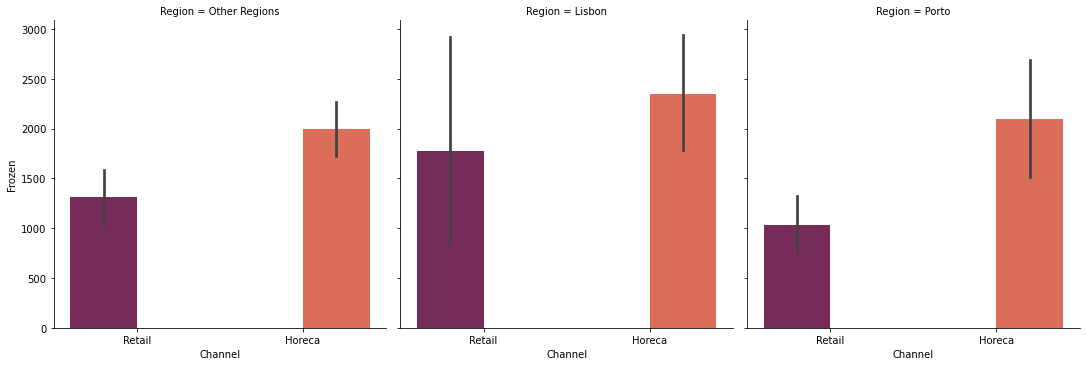

In [23]:
sns.catplot(x='Channel',y = 'Frozen',hue="Channel", col="Region", data=data,kind="bar", palette="rocket")

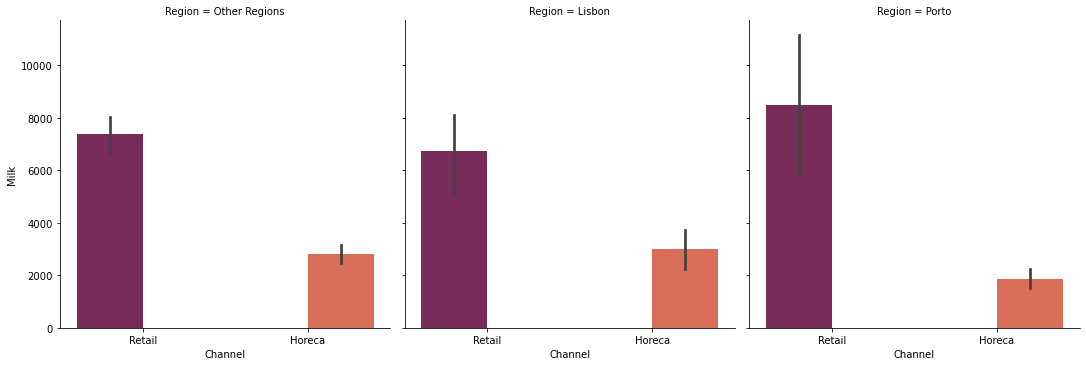

In [24]:
sns.catplot(x='Channel',y = 'Milk',hue="Channel", col="Region", data=data,kind="bar", palette="rocket")

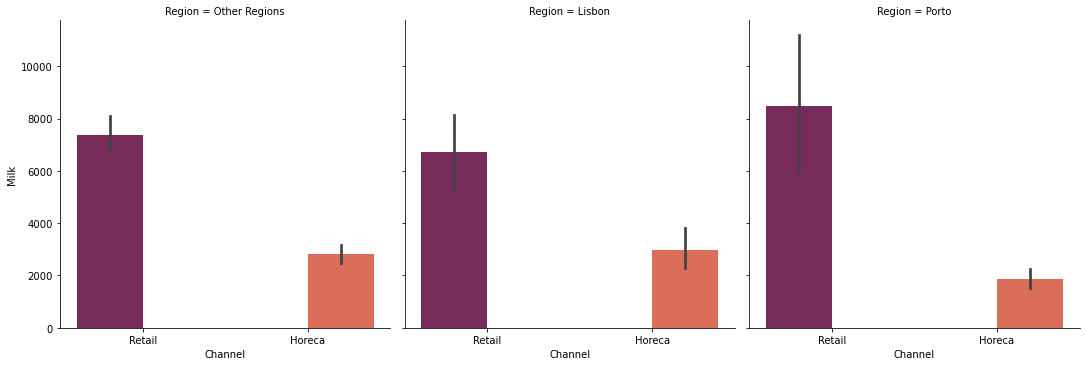

In [25]:
sns.catplot(x='Channel',y = 'Milk',hue="Channel", col="Region", data=data,kind="bar", palette="rocket")

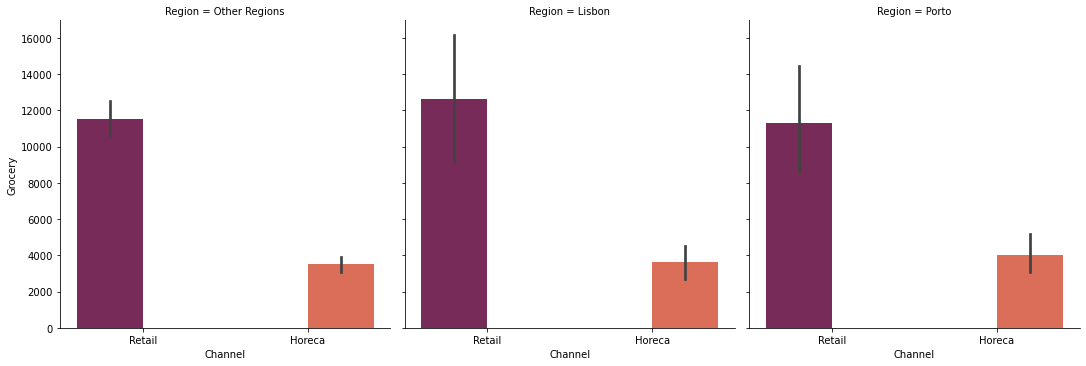

In [26]:
sns.catplot(x='Channel',y = 'Grocery',hue="Channel", col="Region", data=data,kind="bar",palette="rocket")

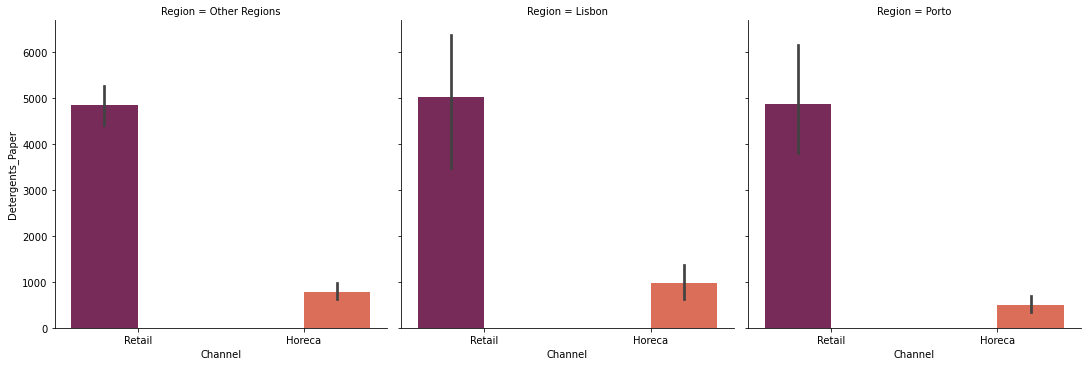

In [27]:
sns.catplot(x='Channel',y = 'Detergents_Paper',hue="Channel", col="Region", data=data,kind="bar", palette="rocket")

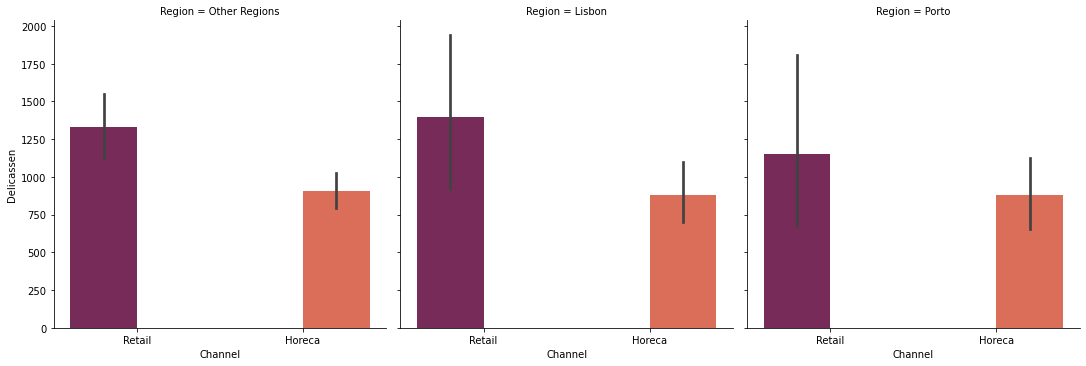

In [28]:
sns.catplot(x='Channel',y = 'Delicassen',hue="Channel", col="Region", data=data,kind="bar", palette="rocket")

### Let's see whether there is any significant relationship between variables with the aid of scatter plots

In [31]:
#Removing the meaning given to the columns 'Channel' and 'Region', and providing the encoded values again before performing pca and kmeans
data['Channel'] = data['Channel'].replace(['Horeca','Retail'],[1,2])
data['Region'] = data['Region'].replace(['Lisbon','Porto','Other Regions'],[1,2,3])

array([[<AxesSubplot:xlabel='Channel', ylabel='Channel'>,
        <AxesSubplot:xlabel='Region', ylabel='Channel'>,
        <AxesSubplot:xlabel='Fresh', ylabel='Channel'>,
        <AxesSubplot:xlabel='Milk', ylabel='Channel'>,
        <AxesSubplot:xlabel='Grocery', ylabel='Channel'>,
        <AxesSubplot:xlabel='Frozen', ylabel='Channel'>,
        <AxesSubplot:xlabel='Detergents_Paper', ylabel='Channel'>,
        <AxesSubplot:xlabel='Delicassen', ylabel='Channel'>],
       [<AxesSubplot:xlabel='Channel', ylabel='Region'>,
        <AxesSubplot:xlabel='Region', ylabel='Region'>,
        <AxesSubplot:xlabel='Fresh', ylabel='Region'>,
        <AxesSubplot:xlabel='Milk', ylabel='Region'>,
        <AxesSubplot:xlabel='Grocery', ylabel='Region'>,
        <AxesSubplot:xlabel='Frozen', ylabel='Region'>,
        <AxesSubplot:xlabel='Detergents_Paper', ylabel='Region'>,
        <AxesSubplot:xlabel='Delicassen', ylabel='Region'>],
       [<AxesSubplot:xlabel='Channel', ylabel='Fresh'>,
        <Axe

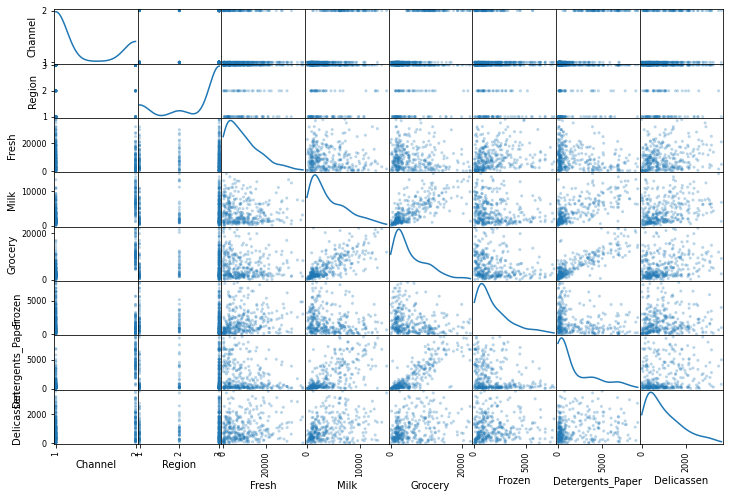

In [32]:
#Plotting a pair scatter plot
pd.plotting.scatter_matrix(data, alpha=0.3, figsize=(12,8), diagonal='kde')

#### Plotting a correlation plot to check how significant the relationships between the variables are

<AxesSubplot:>

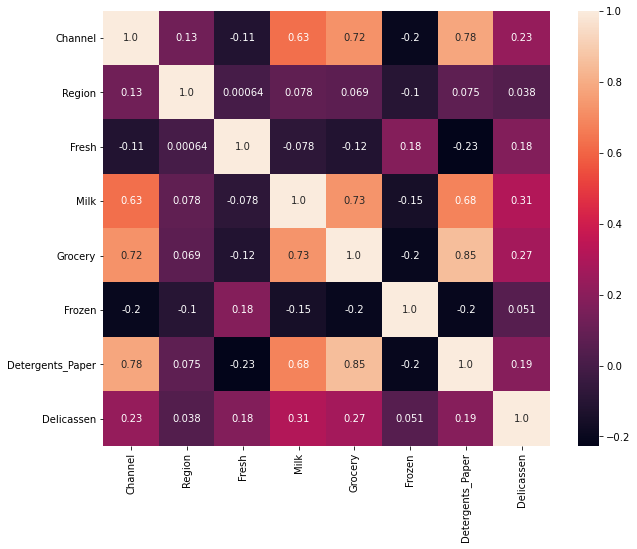

In [33]:
#Plotting the correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt='.2')

## PCA

In [61]:
#Scaling the data before using PCA
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
std_scaler.fit(data)
data_scaled = std_scaler.transform(data)

In [62]:
# Using PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_scaled)

PCA()

Text(0, 0.5, 'Cumulative explained variance')

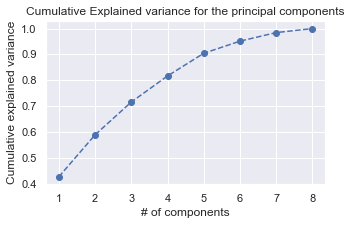

In [63]:
# Plotting the cumulative explained variance graph to determine the ideal number of principal components to use
plt.plot(range(1, len(data.columns)+1), 
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--'
        )
plt.title("Cumulative Explained variance for the principal components")
plt.xlabel("# of components")
plt.ylabel("Cumulative explained variance")

The cumulative explained variance's marginal increase for an additional component drops at 6 principal components hence we will choose 6 Principal Components

In [37]:
#Fitting 6 principal components using the PCA function
pca = PCA(n_components=6)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

In [38]:
#Creating a dataframe for the dataset after using PCA
pc_data=pd.DataFrame(data_pca, columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])

In [39]:
#Viewing 'pc_data'
pc_data

,PC1,PC2,PC3,PC4,PC5,PC6
0,2.044281,0.171793,-0.796529,-0.617157,0.326252,0.374699
1,2.424172,0.467264,-0.391356,0.245548,-0.431963,0.298380
2,-1.409707,1.993533,-0.116611,1.848599,-0.669723,-0.379641
3,1.454318,0.078813,-0.752666,-0.379383,-0.146284,0.090181
4,1.011908,-0.596653,-0.724544,-0.208136,0.940660,-1.062094
...,...,...,...,...,...,...
327,-1.038638,-0.093446,-1.108864,-0.892251,1.261607,-0.196277
328,-0.916833,-0.439783,-0.612475,0.046025,-1.302472,0.212845
329,-0.004126,0.075045,-0.844440,-0.580415,0.671628,0.319191
330,-0.956743,0.520680,-0.996940,-0.751765,-1.233652,-0.202537


In [40]:
#Creating a variable with the columns of 'data'
x=data.columns

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

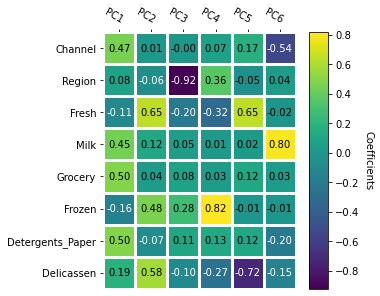

In [41]:
#Using the 'psynlig' library to plot the correlation plot indicating the correlation between the 6 principal components and the original features
from psynlig import pca_loadings_map

# Plotting the correlation plot
pca_loadings_map(pca,x,textcolors=['white','black'])

In [42]:
#Creating a function to easily plot the biplot by calling the function name 
def biplot(score,coef,labels=None):
 
    X = score[:,0]
    Y = score[:,1]
    n = coef.shape[0]
    X_scaled = 1.0/(X.max() - X.min())
    Y_scaled = 1.0/(Y.max() - Y.min())
    plt.scatter(X * X_scaled, Y * Y_scaled,s=5, color='blue')
    for i in range(n):
        plt.arrow(0, 0, coef[i,0], coef[i,1],color = 'red',alpha = 0.5)
        plt.text(coef[i,0]* 1.15, coef[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
    plt.figure()

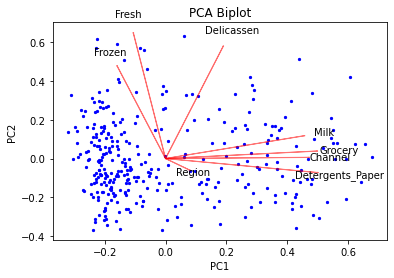

<Figure size 432x288 with 0 Axes>

In [43]:
plt.title('PCA Biplot')
biplot(data_pca, np.transpose(pca.components_), list(data.columns))

## KMeans

In [44]:
#Importing KMeans from sklearn library
from sklearn.cluster import KMeans

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

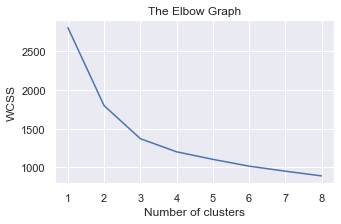

In [59]:
#Plotting the elbow graph to find the optimal number of clusters to go for
sns.set()
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300,
                    n_init=10)
    kmeans.fit(pc_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 9), wcss)
plt.xticks(ticks=range(1, 9))
plt.title('The Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

There is a bend at number of clusters = 2 and seems like an elbow point hence we will visualise 2 clusters using kmeans

In [46]:
#Using kmeans to form 2 clusters
kmeans = KMeans(n_clusters = 2,
                init = 'k-means++',
                max_iter = 300,
                n_init=10,
                random_state = 0)
#Predicting the cluster id's using kmeans
y_kmeans = kmeans.fit_predict(pc_data)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [47]:
#Creating a column named 'Cluster' in 'pc_data' to store the cluster ids
pc_data['Cluster'] = y_kmeans
pc_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
0,2.044281,0.171793,-0.796529,-0.617157,0.326252,0.374699,1
1,2.424172,0.467264,-0.391356,0.245548,-0.431963,0.298380,1
2,-1.409707,1.993533,-0.116611,1.848599,-0.669723,-0.379641,0
3,1.454318,0.078813,-0.752666,-0.379383,-0.146284,0.090181,1
4,1.011908,-0.596653,-0.724544,-0.208136,0.940660,-1.062094,1


In [48]:
#Checking how many data points fall under each cluster
pc_data.Cluster.value_counts()

0    231
1    101
Name: Cluster, dtype: int64

In [49]:
#Viewing the cluster centroids
kmeans.cluster_centers_

array([[-1.09939770e+00, -2.09522669e-03, -1.42658255e-02,
        -1.16024678e-02, -5.25303742e-02,  7.36182806e-02],
       [ 2.51446404e+00,  4.79205312e-03,  3.26277790e-02,
         2.65363372e-02,  1.20143727e-01, -1.68374483e-01]])

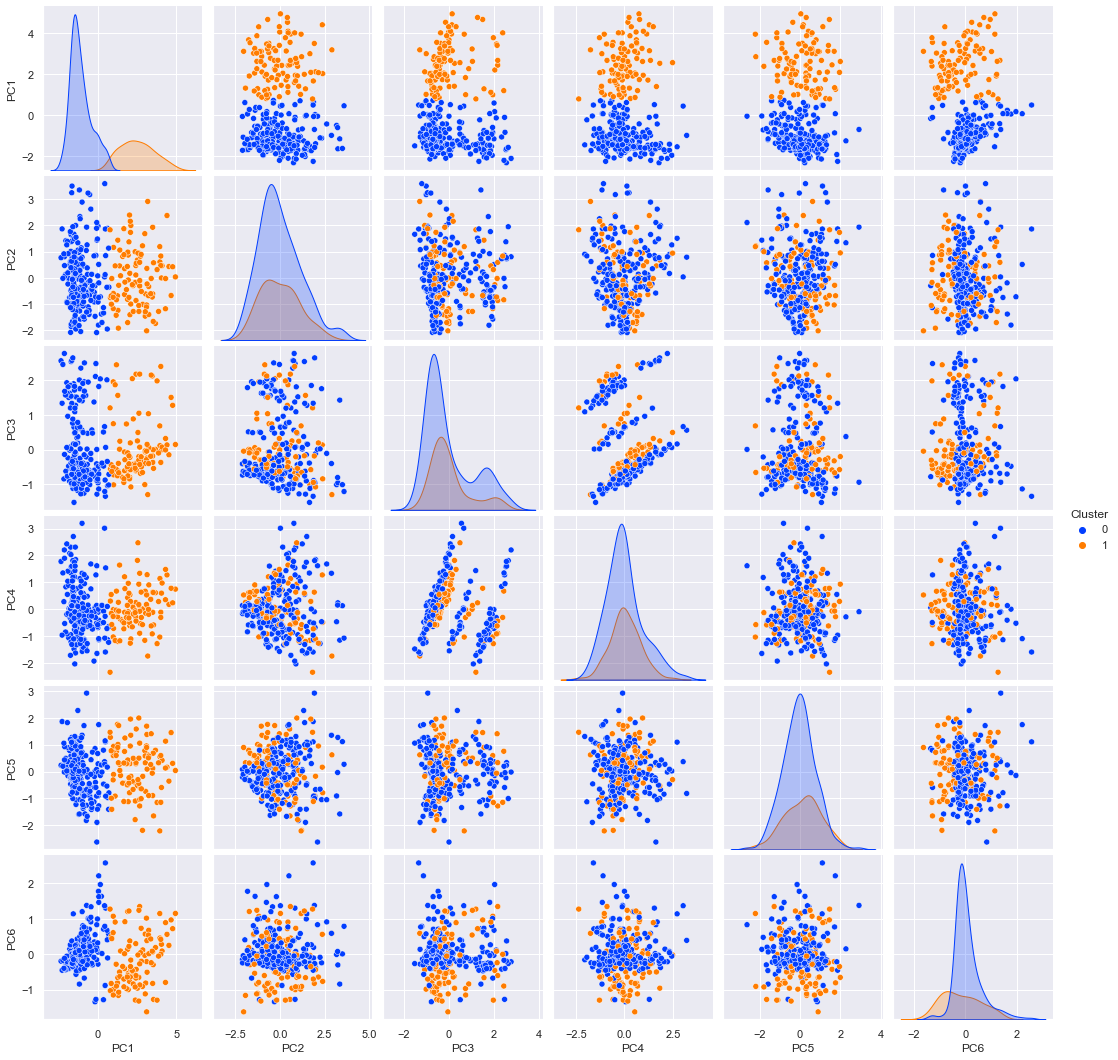

In [50]:
#Plotting scatter plots for all principal components using a pairplot to visualise how the clusters look like 
sns.pairplot(data=pc_data, hue= 'Cluster', palette='bright')

Looks like there are clear clusters without any intersection between PC1 and other principal components.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


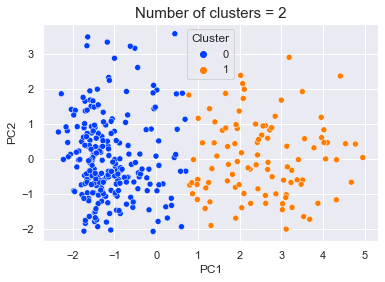

In [51]:
#Plotting the scatter plot between PC1 and PC2 for 2 clusters to be put in the report
sns.scatterplot('PC1','PC2',hue='Cluster',data=pc_data,palette='bright')
plt.title("Number of clusters = 2", fontsize=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Using kmeans to form 3 clusters. This is done to show that 2 clusters is the optimal number.

In [52]:
#Forming 3 clusters
kmeans1 = KMeans(n_clusters = 3,
                init = 'k-means++',
                max_iter = 300,
                n_init=10,
                random_state = 0)
#Predicting the cluster  IDs for each row in the dataset
y_kmeans1 = kmeans1.fit_predict(pc_data)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [53]:
#Creating a column named 'cluster' in 'pc_data' to store the cluster ids
pc_data['cluster'] = y_kmeans1
pc_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Cluster,cluster
0,2.044281,0.171793,-0.796529,-0.617157,0.326252,0.374699,1,1
1,2.424172,0.467264,-0.391356,0.245548,-0.431963,0.298380,1,1
2,-1.409707,1.993533,-0.116611,1.848599,-0.669723,-0.379641,0,0
3,1.454318,0.078813,-0.752666,-0.379383,-0.146284,0.090181,1,1
4,1.011908,-0.596653,-0.724544,-0.208136,0.940660,-1.062094,1,1


In [54]:
#Viewing the cluster centroids
pc_data.cluster.value_counts()

0    163
1     98
2     71
Name: cluster, dtype: int64

In [55]:
#Viewing the cluster centroids
kmeans1.cluster_centers_

array([[-1.03349475e+00, -8.67301203e-02, -6.19496100e-01,
         1.57725081e-01, -1.04818413e-01,  1.30084285e-01,
         1.11022302e-16],
       [ 2.56203209e+00, -6.42052473e-03, -1.75233593e-02,
         7.38197232e-02,  1.12138924e-01, -2.06728920e-01,
         1.00000000e+00],
       [-1.16365494e+00,  2.07974944e-01,  1.44641061e+00,
        -4.63993254e-01,  8.58561525e-02, -1.33000614e-02,
         4.22535211e-02]])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


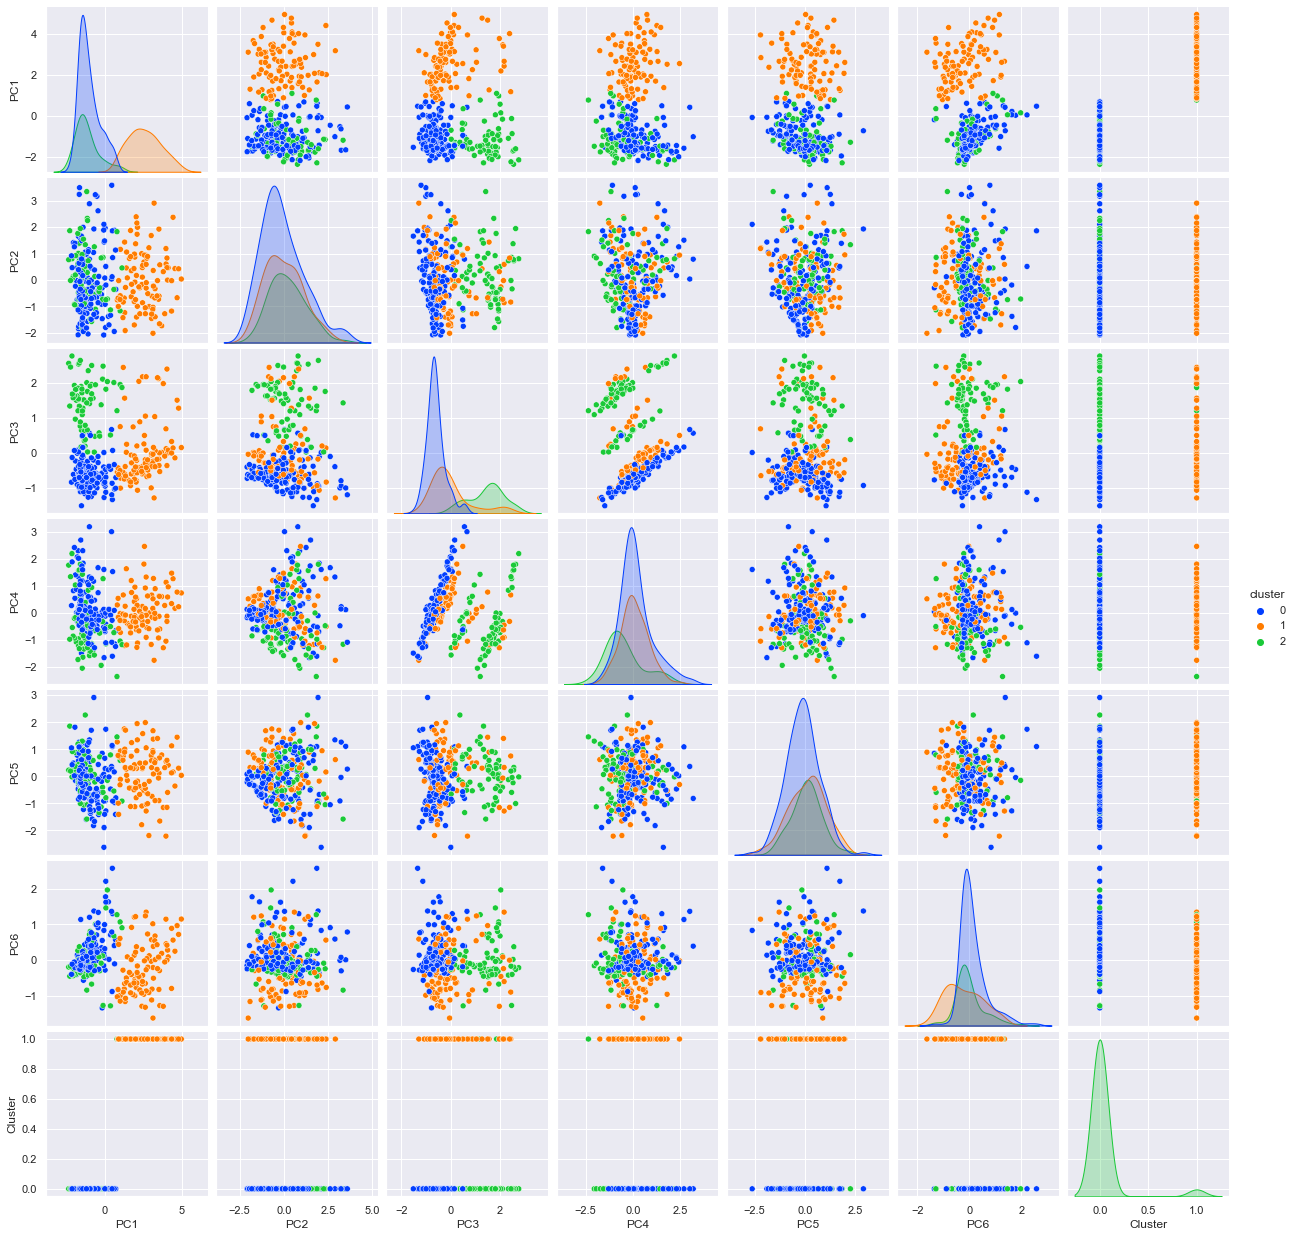

In [56]:
#Plotting scatter plots for all principal components using a pairplot to visualise how the clusters look like 
sns.pairplot(data=pc_data, hue= 'cluster', palette='bright')

It is quite visible that the clusters do not look clearcut. Infact, there seems to be some intersection between atleast two of the clusters.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


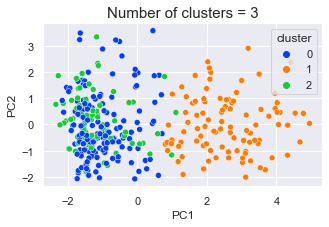

In [58]:
#Plotting the scatter plot between PC1 and PC2 for 3 clusters to be put in the report
plt.rcParams["figure.figsize"] = (5,3) 
sns.scatterplot('PC1','PC2',hue='cluster',data=pc_data,palette='bright')
plt.title("Number of clusters = 3", fontsize=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Task 2: Regression

Regression Dataset source link: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

## Importing the datasets and necessary libraries

In [1]:
#Importing the numpy,pandas,matplot libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import  metrics, linear_model
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [2]:
#Importing the dataset
data=pd.read_csv("../Coursework/boston.csv") 

In [3]:
#Viewing the dataset
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
#Dropping the duplicate rows
data=data.drop_duplicates()

In [5]:
#Checking the number of rows and columns after removing duplicates
data.shape   #Output indicates that there were no duplicates (number or rows and columns were the same as before)

(506, 14)

In [6]:
#Going through the datatypes and other information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 59.3 KB


In [7]:
#Checking for any missing values in 'data'
pd.isnull(data).sum(axis=0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
#Viewing the statistics of the columns of the dataset
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Minimum and maximum values of the variables seem to be within the range.

ZN has 0 for 25th, 50th percentiles and CHAS has  0 for 25th, 50th and 75th percentiles. These variables are conditional and categorical in nature hence these statistics are understandable. We make an assumption here that these columns may not be useful in performing regression to predict MEDV.

In [9]:
#dropping CHAS and ZN columns
data=data.drop(['CHAS','ZN'],axis=1)

In [10]:
#Removing outliers in all the column variables except for the target variable 'MEDV'
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
ul = q3+(1.5*iqr)
Ll = q1-(1.5*iqr)
data=data[(data.CRIM < ul.CRIM) & (data.CRIM > Ll.CRIM)]
data=data[(data.INDUS < ul.INDUS) & (data.INDUS > Ll.INDUS)]
data=data[(data.NOX < ul.NOX) & (data.NOX > Ll.NOX)]
data=data[(data.RM < ul.RM) & (data.RM > Ll.RM)]
data=data[(data.TAX < ul.TAX) & (data.TAX > Ll.TAX)]
data=data[(data.RAD < ul.RAD) & (data.RAD > Ll.RAD)]
data=data[(data.DIS < ul.DIS) & (data.DIS > Ll.DIS)]
data=data[(data.AGE < ul.AGE) & (data.AGE > Ll.AGE)]
data=data[(data.PTRATIO < ul.PTRATIO) & (data.PTRATIO > Ll.PTRATIO)]
data=data[(data.B < ul.B) & (data.B > Ll.B)]
data=data[(data.LSTAT < ul.LSTAT) & (data.LSTAT > Ll.LSTAT)]

In [11]:
#Viewing the shape of 'data'
data.shape

(353, 12)

The number of rows of 'data' has decreased from 506 to 353.

## EDA

#### Lets's visualise how well the predictor variables affect MEDV , using data visualisations

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


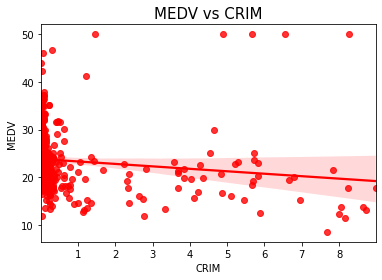

In [12]:
#Effect of CRIM on MEDV
sns.regplot(data['CRIM'],data['MEDV'],data=data, color='red')
plt.title("MEDV vs CRIM", fontsize=15)
plt.xlabel("CRIM")
plt.ylabel("MEDV")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


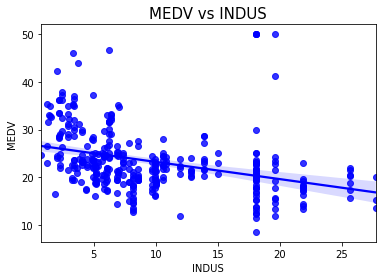

In [13]:
#Effect of INDUS on MEDV
sns.regplot(data['INDUS'],data['MEDV'],data=data, color='b')
plt.title("MEDV vs INDUS", fontsize=15)
plt.xlabel("INDUS")
plt.ylabel("MEDV")
plt.show()

[]

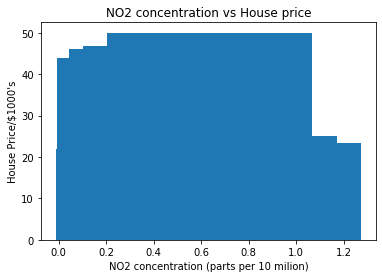

In [16]:
#Effect of NO2 concentration on MEDV
plt.bar(data.NOX,data.MEDV)
plt.xlabel('NO2 concentration (parts per 10 milion)')
plt.ylabel("House Price/$1000's")
plt.title('NO2 concentration vs House price')
plt.plot()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


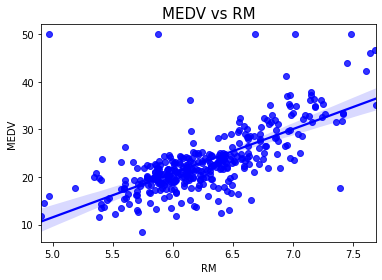

In [15]:
#Impact of RM on MEDV
sns.regplot(data['RM'],data['MEDV'],data=data, color='b')
plt.title("MEDV vs RM", fontsize=15)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


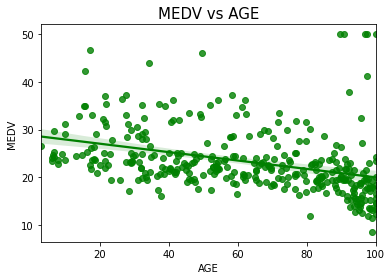

In [16]:
#Impact of AGE on MEDV
sns.regplot(data['AGE'],data['MEDV'],data=data, color='g')
plt.title("MEDV vs AGE", fontsize=15)
plt.xlabel("AGE")
plt.ylabel("MEDV")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


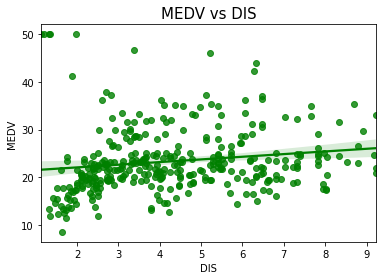

In [17]:
#Impact of DIS on MEDV
sns.regplot(data['DIS'],data['MEDV'],data=data, color='g')
plt.title("MEDV vs DIS", fontsize=15)
plt.xlabel("DIS")
plt.ylabel("MEDV")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


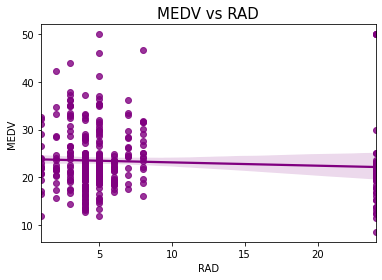

In [18]:
#Impact of RAD on MEDV
sns.regplot(data['RAD'],data['MEDV'],data=data, color='purple')
plt.title("MEDV vs RAD", fontsize=15)
plt.xlabel("RAD")
plt.ylabel("MEDV")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


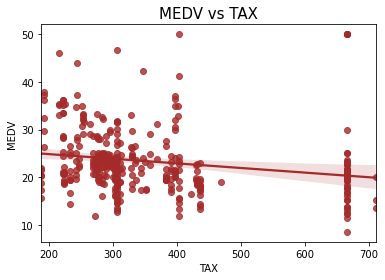

In [19]:
#Impact of TAX on MEDV
sns.regplot(data['TAX'],data['MEDV'],data=data, color='brown')
plt.title("MEDV vs TAX", fontsize=15)
plt.xlabel("TAX")
plt.ylabel("MEDV")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


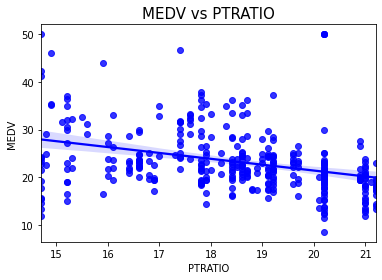

In [20]:
#Impact of PTRATIO on MEDV
sns.regplot(data['PTRATIO'],data['MEDV'],data=data, color='b')
plt.title("MEDV vs PTRATIO", fontsize=15)
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


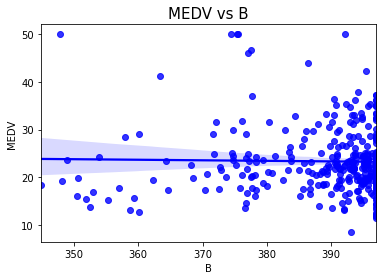

In [21]:
#Imoact of B on MEDV
sns.regplot(data['B'],data['MEDV'],data=data, color='b')
plt.title("MEDV vs B", fontsize=15)
plt.xlabel("B")
plt.ylabel("MEDV")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


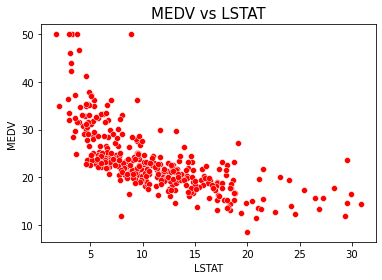

In [14]:
#Plotting a scatter plot between MEDV and LSTAT
sns.scatterplot(data['LSTAT'],data['MEDV'],data=data, color='r')
plt.title("MEDV vs LSTAT", fontsize=15)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:1595: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:1668: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


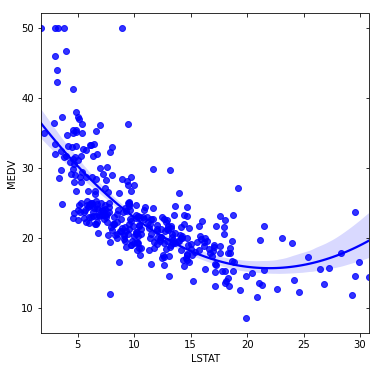

In [22]:
#Impact of LSTAT on MEDV using scatter plot
grid = sns.JointGrid(x='LSTAT', y='MEDV', data=data, space=0, size=6, ratio=50)
grid.plot_joint(sns.regplot, color="b", order=2)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


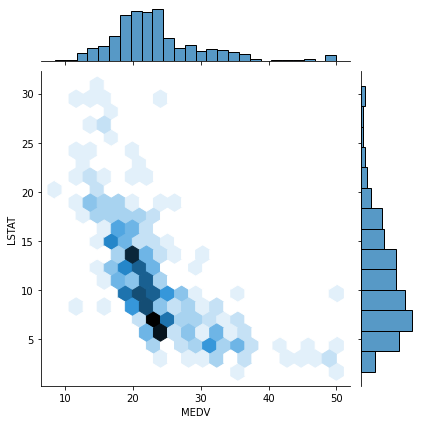

In [23]:
#Impact of LSTAT on MEDV using KDE plot
sns.jointplot(data['MEDV'], data['LSTAT'], kind='hex')

<AxesSubplot:>

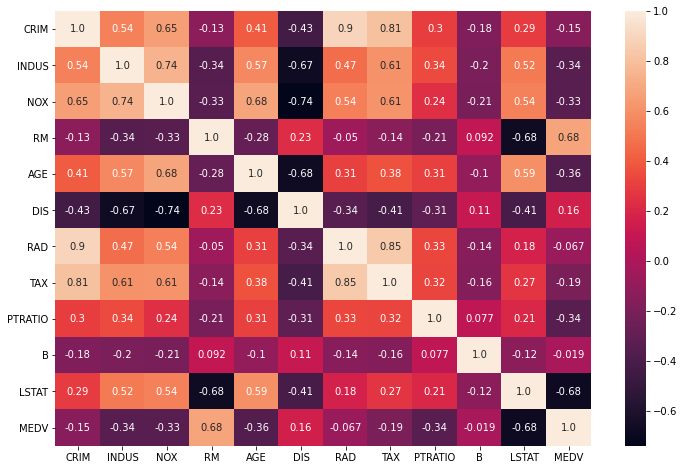

In [24]:
#Correlation plot to check for multicollinearity
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt='.2')

Assumptiom :-Let's consider a variable to be highly correlated if magnitude of correlation is greater than or equal to 0.8.

CRIM and RAD, RAD and TAX , TAX and RAD seem to be highly correlated ,hence we will remove these variables if needed once we do the feature selection below.

## Feature Selection

In [12]:
#Seperating features and labels from the main dataset
features = data.drop(['MEDV'], axis=1)
labels = data['MEDV']

In [13]:
#Using SelectKBest to find the best features for our model
sel = SelectKBest(k=3)
sel.fit(features, labels)
fe = sel.transform(features)

In [14]:
#Storing the columns in 'data' to a variable named 'selectx'
selectx=data.columns

In [15]:
#Dropping the target variable from 'selectx'
selectx=selectx.drop(['MEDV'])

In [16]:
#Creating a dataframe with the features and it's respective selection scores
df = pd.DataFrame({"Features": selectx,"Selection Score": sel.scores_})

<AxesSubplot:xlabel='Features', ylabel='Selection Score'>

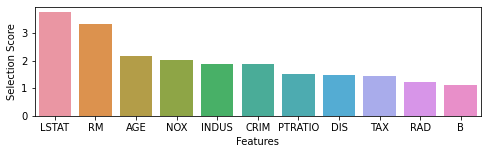

In [17]:
#Plotting a barplot to visualise importance of the predictor variables
plt.figure(figsize=(8,2))
sns.barplot(x='Features',y="Selection Score", data=df,order=df.sort_values('Selection Score', ascending=False).Features)

Since high multicollinearity occurs mainly due to the variable 'RAD' and'TAX', the least important predictor variables 'TAX' ,'RAD' and 'B' are removed from the model.

## Modelling

In [18]:
#Selecting the features we need for the model
selected_cols= ['LSTAT', 'RM', 'AGE','NOX','INDUS', 'CRIM', 'PTRATIO', 'DIS']
features = features[selected_cols]

In [19]:
#Splitting the features and labels into train and test sets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=5)

In [20]:
#Scaling the train and test
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.fit_transform(X_test)

### Multiple Linear Regression

In [27]:
LR_model = linear_model.LinearRegression()

In [28]:
#Fitting the linear regression model
LR_model.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
#Viewing the coefficients in our model equation
LR_model.coef_

array([-2.64779192,  2.34493418, -0.59141222, -1.46654601, -0.16390588,
        1.15354074, -1.46978386, -2.12922696])

In [30]:
#Viewing the intercept in our model equation
LR_model.intercept_

23.22021276595745

In [31]:
#Evaluating the model
y_pred = LR_model.predict(X_test_scaled)

print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_pred))) 
print("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("R Squared: {}".format(model.score(X_test_scaled, y_test)))

Mean Squared Error: 14.645230510306012
Mean Absolute Error: 2.747049013615087
Root Mean Squared Error: 3.8269087407862252
R Squared: 0.7034459334457077


#### Checking whether multiple linear regression assumptions hold

In [32]:
#Finding the residuals
residuals= y_test-y_pred

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


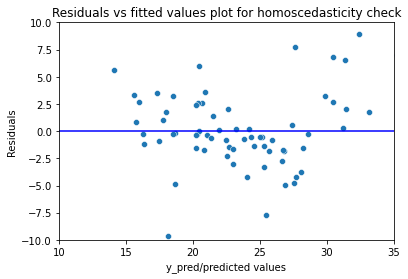

In [33]:
#Checking assumption that errors are homoscedastic
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(10,35)
p = sns.lineplot([10,35],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

The homoscedastic assumption holds as seen in the above plot

(-15.0, 10.0)

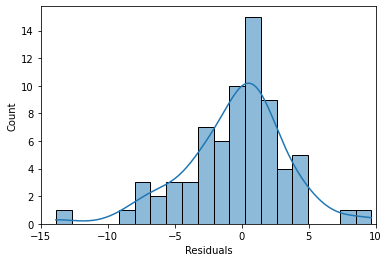

In [34]:
#Plotting the error distribution to check whether the errors are normally distributed
plt.figure()
sns.histplot((y_pred-y_test),bins=20,kde='True')
plt.xlabel('Residuals')
plt.xlim([-15,10])

Error terms seem to be approximately normally distributed as seen in the above plot

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


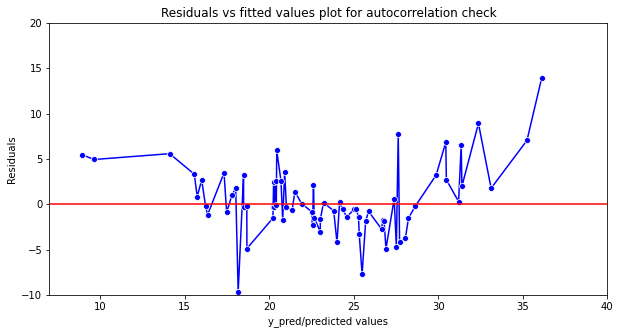

In [35]:
#Checking for autocorrelation assumption
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,20)
plt.xlim(7,40)
p = sns.lineplot([7,40],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

Let's test whether autocorrelation is indeed an issue using the Durbin Watson hypothesis test such that,

H0: Model does not suffer from autocorrelation

H1: Model suffers from autocorrelation

In [36]:
#performing the durbin watson test
durbin_watson(residuals)

1.7006326438554664

Since the durbin watson Test statistic is within the 1.5 and 2.5 range, we fail to reject H0 at the 5% significance level, hence we conclude that the statistical results tell us that the model does not suffer from autocorrelation.

Hence seems like all the assumptions are satisfied by the linear regression model and the multiple linear regression model is a good fit

We next check the performance of non-linear regression models.

### Polynomial regression of degree 2

In [37]:
#Fitting the 2nd degree polynomial regression model
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train_scaled)
polyregmodel = LinearRegression()
polyregmodel.fit(X_poly, y_train)

LinearRegression()

In [38]:
#Viewing the coefficients of the model equation
polyregmodel.coef_

array([ 5.79981012e-14, -1.90379790e+00,  3.05878214e+00, -2.13821591e+00,
       -1.21558735e+00,  8.39365666e-01, -3.52976952e+00, -9.88403312e-02,
       -3.48394386e+00,  3.98664420e-01, -5.21917867e-01, -8.46032292e-01,
        2.67298345e+00, -9.32692528e-01, -3.44708800e+00, -3.54543320e-01,
        5.05330495e-02,  3.24153356e-01, -1.37080614e+00,  2.92583080e+00,
       -3.44331686e-01, -1.58395242e+00, -7.41033191e-01,  6.12905876e-01,
       -3.41072887e-02, -2.44427159e+00,  3.54581031e-01,  6.41508187e-01,
       -7.19768631e-02,  1.87759025e-01, -1.14222799e+00,  3.20036515e+00,
        7.53005491e-01, -6.68674708e-01, -4.13161943e-01,  3.25340895e-01,
        5.84660083e-02, -5.06856804e-01,  2.30435131e+00, -8.00932992e-01,
        2.28695025e+00, -4.52920263e+00,  4.27692473e-01,  3.60984394e-01,
        6.64264057e-01])

In [39]:
#Viewing the intercept of the model equation
polyregmodel.intercept_

20.808923593756212

In [40]:
#Evaluating the model
X_poly2 = poly_reg.fit_transform(X_test_scaled)
y_pred = polyregmodel.predict(X_poly2)

print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_pred)))#lower the better
print("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_pred))) #lower the better
print("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))#lower the better
r2 = r2_score(y_test,y_pred)
print('R squared:',r2)

Mean Squared Error: 8.404476959700803
Mean Absolute Error: 2.0395302446700154
Root Mean Squared Error: 2.899047595280354
R squared: 0.8298161426747629


### Random Forest

In [41]:
#Fitting the random forest model
model = RandomForestRegressor(random_state=4)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=4)

In [42]:
#Viewing the default parameters
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}

In [43]:
#Evaluating the model
y_pred = model.predict(X_test_scaled)

print("R squared: {}".format(model.score(X_test_scaled, y_test)))#~1 is better
print("Mean Abs Error: {}".format(metrics.mean_absolute_error(y_test, y_pred))) #lower the better
print("MSE: {}".format(metrics.mean_squared_error(y_test, y_pred)))#lower the better
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))#lower the better

R squared: 0.8090003125589731
Mean Abs Error: 2.2842676056338034
MSE: 9.432460267605638
RMSE: 3.0712310671139087


### Hyperparameter tuning for random forest

In [780]:
#Constructing the parameter grid
n_estimators = [70,80] 
max_features = ['auto', 'sqrt'] 
max_depth = [20,30] 
min_samples_split = [2,3]
bootstrap = [True, False] 

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'bootstrap': bootstrap}

In [786]:
#Using randomizedsearchcv to get the best hyperparameters
rf_random = RandomizedSearchCV(estimator = model,param_distributions = random_grid,
               n_iter = 200, cv = 5,verbose=2, random_state=4, n_jobs = -1)

In [787]:
rf_random.fit(X_train_scaled, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=200. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 32 candidates, totalling 160 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=4),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [70, 80]},
                   random_state=4, verbose=2)

In [788]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [70, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 30], 'min_samples_split': [2, 3], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 70, 'min_samples_split': 3, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}  



In [44]:
#Fitting the model with best hyperparameters
randmf = RandomForestRegressor( random_state=4, n_estimators = 70, min_samples_split = 3, max_features ='sqrt', max_depth= 30, bootstrap=False) 
randmf.fit( X_train_scaled, y_train) 

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_split=3, n_estimators=70, random_state=4)

In [45]:
#Evaluating the model
y_pred = randmf.predict(X_test_scaled)

print("R squared: {}".format(randmf.score(X_test_scaled, y_test)))
print("Mean Abs Error: {}".format(metrics.mean_absolute_error(y_test, y_pred))) 
print("MSE: {}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

R squared: 0.8120576026137617
Mean Abs Error: 2.234647887323942
MSE: 9.281476947398668
RMSE: 3.0465516485690287


### Decision Tree Regressor

In [59]:
model = DecisionTreeRegressor(random_state=4)
#getting the default parameters
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 4,
 'splitter': 'best'}

In [60]:
#Fitting the DecisionTreeRegressor model
model.fit(X_train_scaled,y_train)

DecisionTreeRegressor(random_state=4)

In [61]:
#Evaluating the model
y_pred = model.predict(X_test_scaled)
print("R squared: {}".format(model.score(X_test_scaled, y_test)))
print("MSE: {}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Mean Abs Error: {}".format(metrics.mean_absolute_error(y_test, y_pred))) 

R squared: 0.6413069754023548
MSE: 17.71394366197183
RMSE: 4.208793611234914
Mean Abs Error: 2.680281690140845


### Hyperparameter tuning for decision tree

In [475]:
#Making the parameter grid
params= {
           "max_depth" : [1,3,5],
           "min_samples_leaf":[3,4,5],
           "max_leaf_nodes":[None,10,20] 
        }

In [476]:
#Using randomizedsearchcv to tune the model
tunedmodel=RandomizedSearchCV(model,param_distributions=params)

In [477]:
tunedmodel.fit(X_train_scaled,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=4),
                   param_distributions={'max_depth': [1, 3, 5],
                                        'max_leaf_nodes': [None, 10, 20],
                                        'min_samples_leaf': [3, 4, 5]})

In [478]:
#Best hyperparameters are obtained
tunedmodel.best_params_

{'min_samples_leaf': 3, 'max_leaf_nodes': None, 'max_depth': 5}

In [62]:
#Fitting the model with best hyperparameters
DTR_model = DecisionTreeRegressor(min_samples_leaf=3,max_leaf_nodes=None, max_depth=5,random_state=4)
DTR_model.fit( X_train_scaled, y_train) 

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, random_state=4)

In [63]:
#Evaluating the model
y_pred = DTR_model.predict(X_test_scaled)

print("R squared: {}".format(DTR_model.score(X_test_scaled, y_test)))
print("Mean Abs Error: {}".format(metrics.mean_absolute_error(y_test, y_pred))) 
print("MSE: {}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

R squared: 0.7291119716537078
Mean Abs Error: 2.4745373502991868
MSE: 13.377721181535213
RMSE: 3.6575567229415884


## XGBoost Regressor

In [64]:
# create an xgboost regression model
model = XGBRegressor(random_state=3)

In [65]:
#Getting the default parameters
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 3,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [66]:
#Fitting the XGBoostRegressor model
model.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=3, ...)

In [67]:
#Evaluating the model
y_pred = model.predict(X_test_scaled)
print("MSE: {}".format(metrics.mean_squared_error(y_test, y_pred)))#lower the better
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))#lower the better
print("R squared: {}".format(model.score(X_test_scaled, y_test)))#~1 is better
print("Mean Abs Error: {}".format(metrics.mean_absolute_error(y_test, y_pred))) #lower the better

MSE: 12.731886576773375
RMSE: 3.568176926215035
R squared: 0.7421895997749468
Mean Abs Error: 2.5560606352040467


In [68]:
#Viewing the default parameters
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 3,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

### Hyperparameter tuning for XGBoost Regressor

In [488]:
#Creating a parameter grid
params = {
           "n_estimators": [100,150],
           'max_depth': [1,2,3,4,5,None],
           'subsample': [1,2,3,None]
      }

In [489]:
#Using randomizedsearchcv to obtain the best hyperparameters
model_search=RandomizedSearchCV(model,param_distributions=params)

In [490]:
model_search.fit(X_train_scaled,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
  File "C:\Users\hp\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
  

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=3, ...),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, None],
                                        'n_estimators': [100, 150],
                                        'subsample': [1, 2, 3, None]})

In [491]:
#Viewing the best hyperparameters
model_search.best_params_

{'subsample': None, 'n_estimators': 100, 'max_depth': 4}

In [69]:
#Fitting the model using the best hyperparameters
XGBR_model = XGBRegressor(subsample=None, n_estimators=100, max_depth=4, random_state=3 )
XGBR_model.fit( X_train_scaled, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=3, ...)

In [70]:
#Evaluating the model
y_pred = XGBR_model.predict(X_test_scaled)

print("R squared: {}".format(XGBR_model.score(X_test_scaled, y_test)))
print("Mean Abs Error: {}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE: {}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

R squared: 0.7918050337825764
Mean Abs Error: 2.3408916849485584
MSE: 10.281643771630181
RMSE: 3.206500237272747


# Task 3: Classification

Classification Dataset source link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Importing datasets and necessary libraries

In [1]:
#Importing the numpy,pandas,matplot and seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
dataset=pd.read_csv("../Coursework/diabetes.csv")

In [3]:
#Viewing the dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Viewing the number of rows and columns of dataset
dataset.shape

(768, 9)

## Data Cleaning

In [5]:
#Dropping duplicate rows if there is any
dataset=dataset.drop_duplicates()

In [6]:
#Viewing the shape of dataset again to check whether there was any duplicates
dataset.shape

(768, 9)

Since the number of rows and columns do not change, there were no duplicates in the dataset

In [7]:
#Going through the datatypes and other information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [8]:
#Checking for any missing values in 'data'
pd.isnull(dataset).sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values in the dataset

In [9]:
#Viewing the descriptive statistics of the columns of the dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Minimum values of all the column variables are more than or equal to zero and since these variables cannot take negative values by definition, the minimum values are valid. 

In [10]:
#Since there maybe presence of outliers in the numerical predictor variables, we try to remove them
q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
Ll = q1-1.5*iqr
dataset=dataset[(dataset.Pregnancies < ul.Pregnancies) & (dataset.Pregnancies > Ll.Pregnancies)]
dataset=dataset[(dataset.Glucose < ul.Glucose) & (dataset.Glucose > Ll.Glucose)]
dataset=dataset[(dataset.BloodPressure < ul.BloodPressure) & (dataset.BloodPressure > Ll.BloodPressure)]
dataset=dataset[(dataset.SkinThickness < ul.SkinThickness) & (dataset.SkinThickness > Ll.SkinThickness)]
dataset=dataset[(dataset.Insulin < ul.Insulin) & (dataset.Insulin > Ll.Insulin)]
dataset=dataset[(dataset.BMI < ul.BMI) & (dataset.BMI > Ll.BMI)]
dataset=dataset[(dataset.Age < ul.Age) & (dataset.Age > Ll.Age)]
dataset=dataset[(dataset.DiabetesPedigreeFunction < ul.DiabetesPedigreeFunction) & (dataset.DiabetesPedigreeFunction > Ll.DiabetesPedigreeFunction)]

In [11]:
#Viewing the shape of the dataset
dataset.shape

(639, 9)

The number of rows has reduced from 768 to 639 after removing outliers

In [12]:
#Checking how balance the dataset is in terms of the target variable value counts
dataset.Outcome.value_counts()

0    439
1    200
Name: Outcome, dtype: int64

The dataset is imbalanced and has more 0s than 1s (more non-diabetic than diabetic people)

## EDA

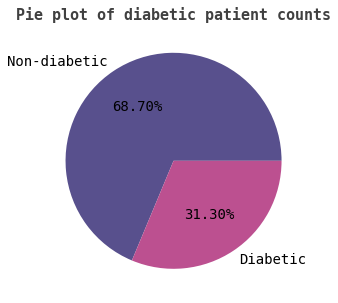

In [26]:
#Checking the imbalance of the dataset through a pie plot
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

ax.pie(dataset.Outcome.value_counts().sort_index(),
         labels = ["Non-diabetic", "Diabetic"],
         autopct='%1.2f%%',
         colors=('#58508d', '#bc5090', '#ff6361'),
         textprops={'fontsize': 14,
                    'family': 'monospace'})
ax.set_title("Pie plot of diabetic patient counts",
                color='#404040',
                family = 'monospace',
                size = 15,
                weight = 'bold')

plt.subplots_adjust(left=0.15)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Barplot represents the class imbalance')

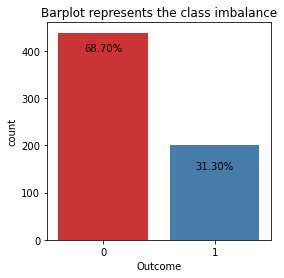

In [27]:
#Checking the imbalance of the dataset through a bar plot
plt.figure(figsize=(4,4))
sns.countplot(dataset['Outcome'],palette='Set1')
plt.text(0,y=400,s="68.70%" ,ha = 'center')
plt.text(1,y=150,s="31.30%" ,ha = 'center')
plt.title('Barplot represents the class imbalance')

### Let's visualise the impacts of the column variables on the target variable 'Outcome'

In [12]:
#Melting the dataset
melted_dataset = pd.melt(dataset, id_vars=['Outcome'], value_vars=['Age','BMI','Glucose','BloodPressure','Pregnancies','Insulin'])
melted_dataset

,Outcome,variable,value
0,1,Age,50.0
1,0,Age,31.0
2,1,Age,32.0
3,0,Age,21.0
4,0,Age,30.0
...,...,...,...
3829,0,Insulin,180.0
3830,0,Insulin,0.0
3831,0,Insulin,112.0
3832,1,Insulin,0.0


In [13]:
#Creating a pivot table to see how the average values of certain variables differs for Outcome=1 and Outcome=1
reindexed_dataset = melted_dataset.pivot_table(values='value', index=['Outcome'], columns=['variable'])
reindexed_dataset

variable,Age,BMI,BloodPressure,Glucose,Insulin,Pregnancies
Outcome,,,,,,
0,30.747153,30.836902,70.71754,109.421412,60.685649,3.302961
1,37.035000,34.571500,75.20000,140.385000,77.445000,4.905000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


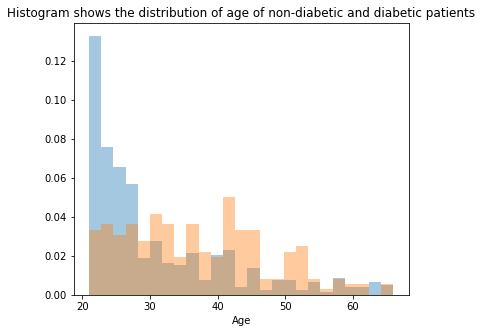

In [14]:
#Plotting a histogram to view impact of age on people having diabetes
plt.figure(figsize=(6,5))

sns.distplot(dataset.loc[dataset['Outcome'] == 0]['Age'],kde=False,norm_hist=True, bins=25) 
sns.distplot(dataset.loc[dataset['Outcome'] == 1]['Age'],kde=False, norm_hist=True, bins=25) 
plt.title('Histogram shows the distribution of age of non-diabetic and diabetic patients')
plt.show()

Text(0.5, 1.0, 'BMI vs Diabetics')

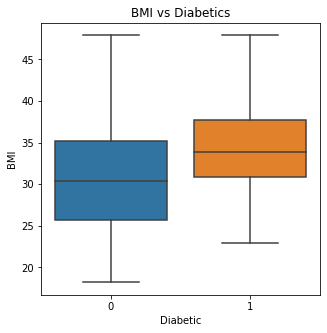

In [18]:
#Plotting a boxplot to find the impact of BMI on people having diabetes
plt.figure(figsize=(5,5))
sns.boxplot(data=dataset,x='Outcome',y='BMI',showfliers=False)
plt.xlabel('Diabetic')
plt.title("BMI vs Diabetics")

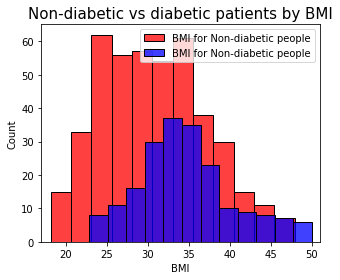

In [13]:
#Impact of BMI on people having diabetes
plt.figure(figsize=(5,4))

sns.histplot(dataset[dataset['Outcome'] == 0]["BMI"], color='red',label="BMI for Non-diabetic people") 
sns.histplot(dataset[dataset['Outcome'] == 1]["BMI"], color='blue',label="BMI for Non-diabetic people") 
plt.legend()
plt.title('Non-diabetic vs diabetic patients by BMI', fontsize=15)
plt.xlim([17,51])
plt.show()

Text(0.5, 1.0, 'Glucose vs Diabetics')

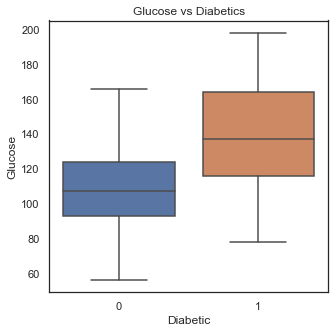

In [231]:
#Boxplot to viisualise impact of Glucose level on people with diabetics
plt.figure(figsize=(5,5))
sns.boxplot(data=dataset,x='Outcome',y='Glucose',showfliers=False)
plt.xlabel('Diabetic')
plt.title("Glucose vs Diabetics")

In [234]:
#Finding the mean of insulin for Diabetic and non-diabetic patients
insulin_data = dataset.groupby('Outcome').agg({'Insulin': 'mean'}).reset_index() 

Text(0.5, 1.0, 'Bar plot representing the mean insulin value for diabetic and non diabetic people')

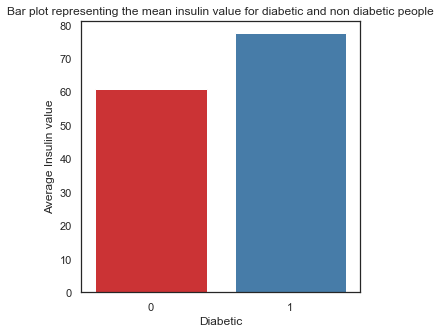

In [236]:
#Creating a barplot to visualise the mean insulin value for diabetic and non diabetic people
plt.figure(figsize=(5,5))
sns.barplot(x='Outcome', y='Insulin',data=insulin_data, palette='Set1')
plt.xlabel('Diabetic')
plt.ylabel('Average Insulin value')
plt.title("Bar plot representing the mean insulin value for diabetic and non diabetic people")

Text(0.5, 1.0, 'BloodPressure vs Diabetics')

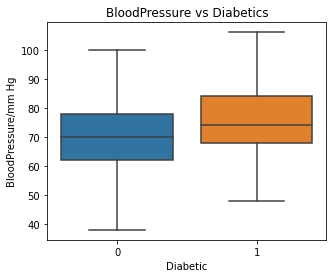

In [14]:
#Boxplot to check the impact of BloodPressure on diabetic people
plt.figure(figsize=(5,4))
sns.boxplot(data=dataset,x='Outcome',y='BloodPressure',showfliers=False)
plt.xlabel('Diabetic')
plt.ylabel('BloodPressure/mm Hg')
plt.title("BloodPressure vs Diabetics")

In [16]:
#Seperating dataset into seperate datasets with data of diabetic and non-diabetic people
diabetic=dataset[dataset.Outcome==1]
non_diabetic=dataset[dataset.Outcome==0]

Text(0.5, 1.0, 'Histogram of Blood Pressure for diabetic and Non-diabetic people')

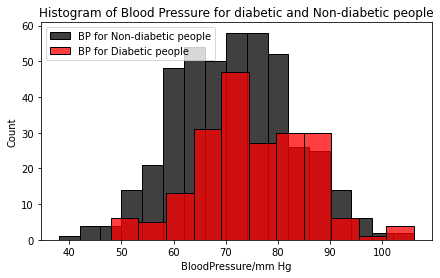

In [17]:
#Plotting a histogram to check the impact of Blood pressure on diabetic patients
plt.figure(figsize=(7,4))
sns.histplot(non_diabetic.BloodPressure,kde=False,color="Black",label="BP for Non-diabetic people")
sns.histplot(diabetic.BloodPressure,kde=False, color="Red", label="BP for Diabetic people")
plt.xlabel('BloodPressure/mm Hg')
plt.legend()
plt.title("Histogram of Blood Pressure for diabetic and Non-diabetic people")

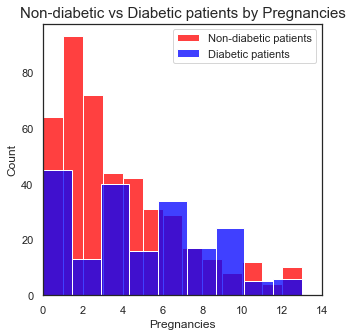

In [253]:
#Impact of BMI on people having diabetes
plt.figure(figsize=(5,5))

sns.histplot(dataset[dataset['Outcome'] == 0]["Pregnancies"], color='red',label='Non-diabetic patients') 
sns.histplot(dataset[dataset['Outcome'] == 1]["Pregnancies"], color='blue',label='Diabetic patients') 
plt.legend()
plt.title('Non-diabetic vs Diabetic patients by Pregnancies', fontsize=15)
plt.xlim([0,14])
plt.show()

Text(0.5, 1.0, 'SkinThickness vs Diabetics')

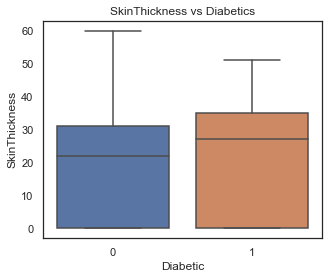

In [254]:
#Visualising the effect of SkinThickness on Diabetic patients
plt.figure(figsize=(5,4))
sns.boxplot(data=dataset,x='Outcome',y='SkinThickness')
plt.xlabel('Diabetic')
plt.title("SkinThickness vs Diabetics")

Text(0.5, 1.0, 'DiabetesPedigreeFunction vs Diabetics')

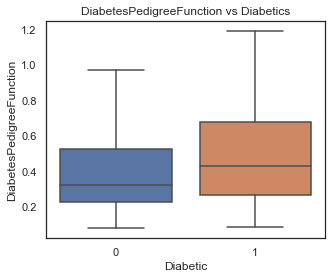

In [256]:
#Visualising the effect of DiabetesPedigreeFunction on Diabetic people
plt.figure(figsize=(5,4))
sns.boxplot(data=dataset,x='Outcome',y='DiabetesPedigreeFunction',showfliers=False)
plt.xlabel('Diabetic')
plt.title("DiabetesPedigreeFunction vs Diabetics")

<AxesSubplot:>

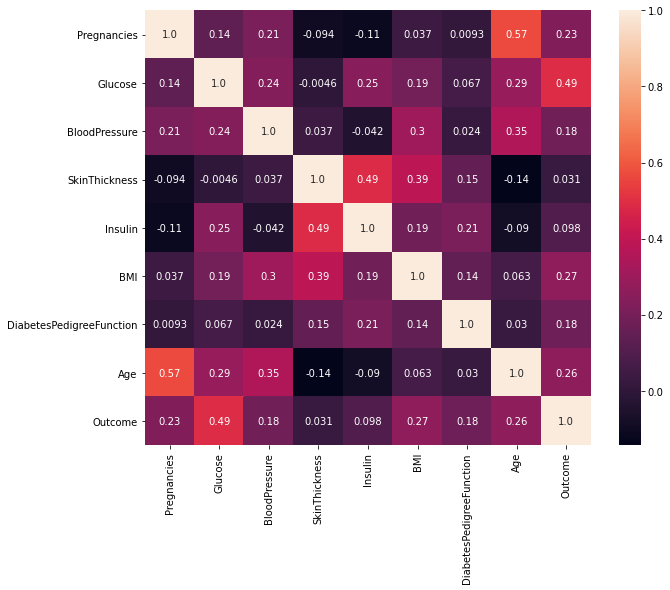

In [66]:
#Correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True,fmt='.2')

Age and Pregnancies seem to have a moderate correlation between them but it is not very strong hence we can avoid dropping any variables.

## Feature Selection

In [13]:
#Importing selectkbest
from sklearn.feature_selection import SelectKBest

In [14]:
#Defining the features and labels
features = dataset.drop(['Outcome'], axis=1)
labels = dataset['Outcome']

In [15]:
#Fitting selectkbest
sel = SelectKBest(k=3)
sel.fit(features, labels)
fe = sel.transform(features)

In [16]:
#Creating a variable 'selectx' containing the column names of 'dataset'
selectx=dataset.columns

In [17]:
#Dropping 'Outcome' from 'selectx'
selectx=selectx.drop(['Outcome'])

In [18]:
#Creating a dataframe 'df' with selection scores for each feature
df = pd.DataFrame({"Columns": selectx,"Selection Score": sel.scores_})

<AxesSubplot:xlabel='Columns', ylabel='Selection Score'>

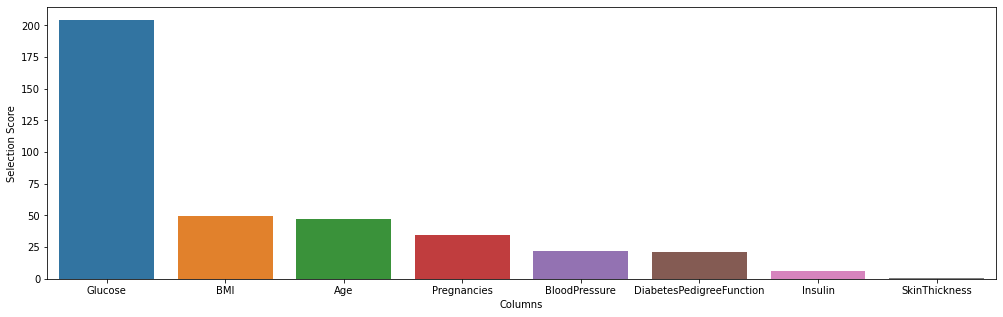

In [19]:
#Plotting a barplot to visualise the selecion score for each feature
plt.figure(figsize=(17,5))
sns.barplot(x='Columns',y="Selection Score", data=df,order=df.sort_values('Selection Score', ascending=False).Columns)

Since the selection score of 'SkinThickness' is very low, we will drop this feature before train and test split

## Modelling

In [20]:
#Dropping SkinThickness
features = features.drop(['SkinThickness'],axis=1)
labels = dataset['Outcome']

In [21]:
#Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test \
= train_test_split(features, labels, test_size=0.2, random_state=3)

In [22]:
#Viewing the shape of x_train and x_test
x_train.shape, x_test.shape

((511, 7), (128, 7))

In [23]:
#Checking whether the 'Outcome' column has balanced data in terms of number of 0s and 1s, in the train set
y_train.value_counts()

0    357
1    154
Name: Outcome, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Diabetic')

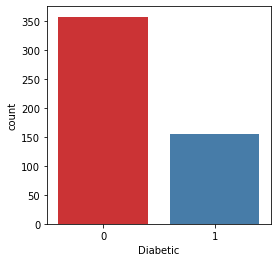

In [24]:
#Visualising the imbalance of the training set through a bar plot
plt.figure(figsize=(4,4))
sns.countplot(y_train,palette='Set1')
plt.xlabel('Diabetic')

There is an imbalance in the training set with more non-diabetic people than diabetic people

In [25]:
#Combining x_train and y_train to make the train set
train_set=pd.concat([x_train,y_train],axis=1)

In [26]:
# Separate majority and minority classes
data_majority = train_set[train_set.Outcome==0]
data_minority = train_set[train_set.Outcome==1]

In [27]:
from sklearn.utils import resample
# Upsampling minority class to get a balanced training set
data_minority_upsampled = resample(data_minority, replace=True, n_samples=357, random_state=123) 

In [28]:
# Combine majority class with upsampled minority class to create a new dataset named 'train_set_1'
train_set_1 = pd.concat([data_majority, data_minority_upsampled])

In [29]:
# Display new class count in the training set
train_set_1.Outcome.value_counts()

0    357
1    357
Name: Outcome, dtype: int64

In [30]:
#Making the new x_train and y_train
x_train=train_set_1.drop(['Outcome'],axis=1)
y_train=train_set_1['Outcome']

In [31]:
#Scaling the x_train and x_test using standard scaling
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_train = std_scaler.transform(x_train)
x_test = std_scaler.transform(x_test)

## Decision Tree

In [32]:
#Importing the DecisionTree Classifier from the sklearn library
from sklearn.tree import DecisionTreeClassifier

In [33]:
model = DecisionTreeClassifier(random_state=2)

In [34]:
#Getting the by default parameters
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2,
 'splitter': 'best'}

In [35]:
#Training the model
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=2)

In [36]:
#Evaluating the model
from sklearn import metrics
pred = model.predict(x_test)
print("Precision: ", metrics.precision_score(y_test,pred))
print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print("Recall: ", metrics.recall_score(y_test, pred))
print("f1 score: ", metrics.f1_score(y_test, pred))
print("Classification report: ")
print(metrics.classification_report(y_test,pred))

Precision:  0.6190476190476191
Accuracy:  0.71875
Recall:  0.5652173913043478
f1 score:  0.5909090909090909
Classification report: 
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        82
           1       0.62      0.57      0.59        46

    accuracy                           0.72       128
   macro avg       0.69      0.69      0.69       128
weighted avg       0.71      0.72      0.72       128



#### Hyperparameter tuning the decision tree model

In [34]:
#Importing GridSearchCV and RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [423]:
#Creating the hyperparameter space
param_dict = {
    'max_depth': [10,20,30,None],
    'criterion': ['entropy','gini', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt','log2']
}

In [424]:
#Using gridsearch
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=2)
gridSearch = GridSearchCV(estimator=model,
                           param_grid =param_dict,
                          scoring='precision',
                           cv=cv,
                           n_jobs=-1,
                           verbose=10)

In [425]:
#Fitting gridsearch
gridSearch.fit(x_train, y_train)

Fitting 20 folds for each of 48 candidates, totalling 960 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=2),
             estimator=DecisionTreeClassifier(random_state=2), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='precision', verbose=10)

In [426]:
#Getting the best parameters for the decision tree model using gridsearch
gridSearch.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [37]:
#Fitting the model using the best parameters
DT_model = DecisionTreeClassifier(max_depth=20, criterion='gini', max_features='sqrt',splitter='best',random_state=2)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, max_features='sqrt', random_state=2)

In [38]:
#Evaluating the new Decision Tree model
pred = DT_model.predict(x_test) #predicting the target variable 'Outcome' from the model using the test set
print("Precision: ", metrics.precision_score(y_test,pred))
print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print("Recall: ", metrics.recall_score(y_test, pred))
print("f1 score: ", metrics.f1_score(y_test, pred))
print("Classification report: ")
print(metrics.classification_report(y_test,pred))

Precision:  0.6511627906976745
Accuracy:  0.7421875
Recall:  0.6086956521739131
f1 score:  0.6292134831460675
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        82
           1       0.65      0.61      0.63        46

    accuracy                           0.74       128
   macro avg       0.72      0.71      0.72       128
weighted avg       0.74      0.74      0.74       128



In [39]:
#Plotting the confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_test, pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,67,15
Actual Positive,18,28


## Logistic Regression

In [41]:
#Importing LogisticRegression from the sklearn library
from sklearn.linear_model import LogisticRegression

In [42]:
LR_model = LogisticRegression()

In [43]:
#Getting the by default parameters
LR_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [44]:
#Training the model
LR_model.fit(x_train,y_train)

LogisticRegression()

In [45]:
#Evaluating the model
from sklearn import metrics
pred = LR_model.predict(x_test)
print("Precision: ", metrics.precision_score(y_test,pred))
print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print("Recall: ", metrics.recall_score(y_test, pred))
print("f1 score: ", metrics.f1_score(y_test, pred))
print("Classification report: ")
print(metrics.classification_report(y_test,pred))

Precision:  0.6730769230769231
Accuracy:  0.78125
Recall:  0.7608695652173914
f1 score:  0.7142857142857143
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        82
           1       0.67      0.76      0.71        46

    accuracy                           0.78       128
   macro avg       0.76      0.78      0.77       128
weighted avg       0.79      0.78      0.78       128



In [46]:
#Plotting the confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_test, pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,65,17
Actual Positive,11,35


No hyperparameter tuning was done for Logistic Regression since it's a basic model and there are no hyperparameters to tune.

## Random Forest

In [47]:
#Importing RandomForestClassifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [48]:
RF_clf = RandomForestClassifier(random_state=3)

In [49]:
#Training the Random forest model
RF_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=3)

In [51]:
#Evaluating the random forest model
pred = RF_clf.predict(x_test)
print("Precision: ", metrics.precision_score(y_test,pred))
print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print("Recall: ", metrics.recall_score(y_test, pred))
print("f1 score: ", metrics.f1_score(y_test, pred))
print("Classification report: ")
print(metrics.classification_report(y_test,pred))

Precision:  0.7714285714285715
Accuracy:  0.7890625
Recall:  0.5869565217391305
f1 score:  0.6666666666666667
Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.77      0.59      0.67        46

    accuracy                           0.79       128
   macro avg       0.78      0.74      0.76       128
weighted avg       0.79      0.79      0.78       128



In [52]:
#Getting the by default parameters
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2,
 'splitter': 'best'}

#### Hyperparameter tuning the Random Forest Classifier model

In [139]:
#Creating the hyperparameter space
param_dict = {
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [2,3,4],
    'criterion': ['gini','log_loss'],
    'n_estimators': [300,400]
}

In [140]:
#Using gridsearch
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=123)
gridSearch = GridSearchCV(estimator=RF_clf,
                           param_grid =param_dict,
                           scoring='accuracy',
                           cv=cv,
                           n_jobs=-1,
                           verbose=10)

In [141]:
#Fitting gridsearch
gridSearch.fit(x_train, y_train)

Fitting 20 folds for each of 36 candidates, totalling 720 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=123),
             estimator=RandomForestClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'log_loss'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 400]},
             scoring='accuracy', verbose=10)

In [142]:
#Getting the best hyperparameters
gridSearch.best_params_

{'criterion': 'log_loss',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400}

In [53]:
#Fitting the new RandomForestClassifier model
RF_model = RandomForestClassifier(criterion='log_loss',min_samples_leaf=2, min_samples_split=2,n_estimators=400,random_state=3)
RF_model.fit(x_train,y_train)

RandomForestClassifier(criterion='log_loss', min_samples_leaf=2,
                       n_estimators=400, random_state=3)

In [54]:
#Evaluating the new random forest model
pred = RF_model.predict(x_test)
print("Precision: ", metrics.precision_score(y_test,pred))
print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print("Recall: ", metrics.recall_score(y_test, pred))
print("f1 score: ", metrics.f1_score(y_test, pred))
print("Classification report: ")
print(metrics.classification_report(y_test,pred))

Precision:  0.75
Accuracy:  0.796875
Recall:  0.6521739130434783
f1 score:  0.6976744186046512
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        82
           1       0.75      0.65      0.70        46

    accuracy                           0.80       128
   macro avg       0.78      0.77      0.77       128
weighted avg       0.79      0.80      0.79       128



In [55]:
#Plotting the confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_test, pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,72,10
Actual Positive,16,30


## XGBoost

In [56]:
#Importing xgboost
import xgboost

In [57]:
model = xgboost.XGBClassifier()

In [58]:
#Training the XGBClassifier model
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [59]:
#Evaluating the model
pred = model.predict(x_test)
print("Precision: ", metrics.precision_score(y_test,pred))
print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print("Recall: ", metrics.recall_score(y_test, pred))
print("f1 score: ", metrics.f1_score(y_test, pred))
print("Classification report: ")
print(metrics.classification_report(y_test,pred))
print("")

Precision:  0.6666666666666666
Accuracy:  0.7421875
Recall:  0.5652173913043478
f1 score:  0.6117647058823529
Classification report: 
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        82
           1       0.67      0.57      0.61        46

    accuracy                           0.74       128
   macro avg       0.72      0.70      0.71       128
weighted avg       0.74      0.74      0.74       128




#### Hyperparameter tuning for XGBoost Classifier

In [715]:
#Creating the hyperparameter space
param_dict = {
             'max_depth' : [2,4,6,8],
              'learning_rate': [0.2,0.4],
               'subsample': [0.5, 0.7, 0.9],
               'colsample_bytree': [0.4,0.5,0.6,0.7]
}

In [735]:
#Using gridsearch
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=123)
gridSearch = GridSearchCV(estimator=model,
                           param_grid =param_dict,
                           scoring='precision',
                           cv=cv,
                           n_jobs=-1,
                           verbose=10)

In [736]:
#Fitting gridsearch
gridSearch.fit(x_train, y_train)

Fitting 20 folds for each of 96 candidates, totalling 1920 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=123),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     impor...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.7],
                         'learning_rate': [0.2, 0.4], 'max_depth': [2, 4, 6, 8],
                         'subsample': [0.5, 0.7, 0.9]},
             scoring='precision', verbose=10)

In [737]:
#Getting the best parameters
gridSearch.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.2,
 'max_depth': 8,
 'subsample': 0.9}

In [60]:
XGB_model = xgboost.XGBClassifier(colsample_bytree=0.6,learning_rate=0.2,max_depth=8, subsample=0.7)

In [61]:
#Training the XGBClassifier model with best parameters
XGB_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [62]:
#Evaluating the XGBClassifier model with best parameters
pred = XGB_model.predict(x_test)
print("Precision: ", metrics.precision_score(y_test,pred))
print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print("Recall: ", metrics.recall_score(y_test, pred))
print("f1 score: ", metrics.f1_score(y_test, pred))
print("Classification report: ")
print(metrics.classification_report(y_test,pred))

Precision:  0.7837837837837838
Accuracy:  0.8046875
Recall:  0.6304347826086957
f1 score:  0.6987951807228915
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.86        82
           1       0.78      0.63      0.70        46

    accuracy                           0.80       128
   macro avg       0.80      0.77      0.78       128
weighted avg       0.80      0.80      0.80       128



In [63]:
#Plotting the confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_test, pred), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,74,8
Actual Positive,17,29


### Plotting the ROC Curves for all the models for comparison

<Figure size 432x288 with 0 Axes>

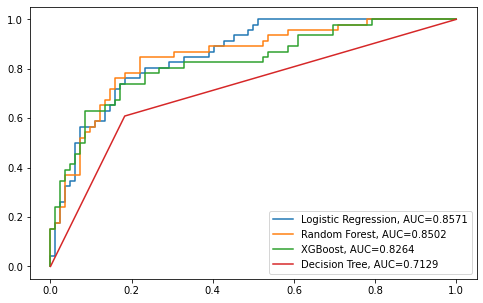

In [65]:
#Plotting the ROC curves
plt.figure(0).clf()
plt.figure(figsize=(8,5))

#fit logistic regression model and plot ROC curve
y_pred = LR_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#Random Forest
y_pred = RF_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#XGBoost
y_pred = XGB_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

#Decision Tree
y_pred = DT_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))


#add legend
plt.legend()

## Plotting the precision recall curve for model comparison

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

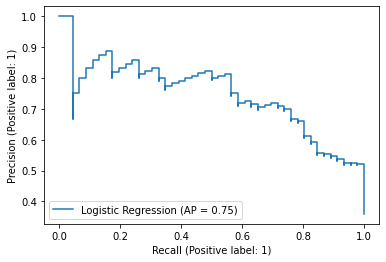

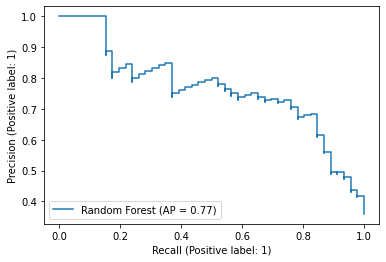

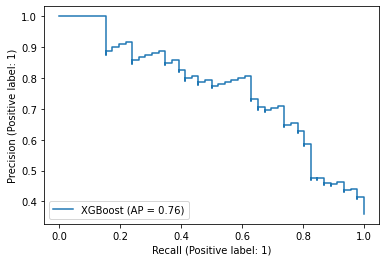

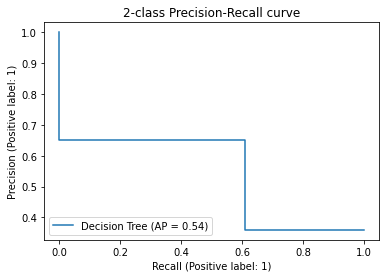

In [66]:
#Plotting the precision recall curve
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(0).clf()
plt.figure(figsize=(5,5))

display = PrecisionRecallDisplay.from_estimator(
    LR_model, x_test, y_test, name="Logistic Regression"
)
display = PrecisionRecallDisplay.from_estimator(
    RF_model, x_test, y_test, name="Random Forest"
)
display = PrecisionRecallDisplay.from_estimator(
    XGB_model, x_test, y_test, name="XGBoost"
)
display = PrecisionRecallDisplay.from_estimator(
    DT_model, x_test, y_test, name="Decision Tree"
)

_ = display.ax_.set_title("2-class Precision-Recall curve")